# Importing libraries

In [1]:
import pandas as pd
#to change appearance of dataframe
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi
import seaborn as sns
sns.set_style(style= 'darkgrid')
import warnings
warnings.filterwarnings('ignore')
#to see null values
import missingno as msno

# Importing data

In [2]:
df = pd.read_csv('Dataset/players_22.csv')

# Data Cleaning and Manipulation

### Checking Columns and Dropping useless columns

In [3]:
print(df.columns)

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)


In [4]:
useless_columns = ['sofifa_id', 'player_url', 'long_name', 'dob', 'club_loaned_from',
                   'nation_position', 'nation_jersey_number', 'body_type', 'real_face',
                   'player_face_url', 'club_logo_url', 'nation_logo_url', 'nation_flag_url',
                    'goalkeeping_speed', 'player_tags', 'nation_team_id']

In [5]:
new_df = df.drop(useless_columns, axis = 1)
print(new_df.columns)

Index(['short_name', 'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_team_id',
       'club_name', 'league_name', 'league_level', 'club_position',
       'club_jersey_number', 'club_joined', 'club_contract_valid_until',
       'nationality_id', 'nationality_name', 'preferred_foot', 'weak_foot',
       'skill_moves', 'international_reputation', 'work_rate',
       'release_clause_eur', 'player_traits', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
      

### Adding BMI columns

In [6]:
new_df['BMI'] = round(new_df['weight_kg'] / (new_df['height_cm'] / 100) ** 2, 2)

### Checking null values in important columns

In [7]:
important_cols = ['dribbling', 'defending', 'physic', 'passing', 'shooting', 'pace']

In [8]:
new_df[important_cols].isnull().sum()

dribbling    2132
defending    2132
physic       2132
passing      2132
shooting     2132
pace         2132
dtype: int64

### Creating new columns from player position to get all type of position a player plays.



In [9]:
print(new_df['player_positions'])

0        RW, ST, CF
1                ST
2            ST, LW
3           LW, CAM
4           CM, CAM
            ...    
19234           CDM
19235            CM
19236            CM
19237            ST
19238           CAM
Name: player_positions, Length: 19239, dtype: object


#### So what we wil get after get_dummies() is dataframe with columns which will be positions split with ',' and if the player plays at that position we will get 1 at that position (column) otherwise 0, basically kind of one hot encoding

In [10]:
new_player_position = new_df['player_positions'].str.get_dummies(sep = ',').add_prefix('Position')


In [11]:
new_player_position.head()

,Position CAM,Position CB,Position CDM,Position CF,Position CM,...,PositionRB,PositionRM,PositionRW,PositionRWB,PositionST
0,0,0,0,1,0,...,0,0,1,0,0
1,0,0,0,0,0,...,0,0,0,0,1
2,0,0,0,0,0,...,0,0,0,0,1
3,1,0,0,0,0,...,0,0,0,0,0
4,1,0,0,0,0,...,0,0,0,0,0


In [12]:
new_df = pd.concat([new_df, new_player_position], axis = 1)
new_df = new_df.drop('player_positions', axis = 1)

In [13]:
# checking values of columns
columns1 = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram',
            'lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb',
            'lb','lcb','cb','rcb','rb']

In [14]:
new_df[columns1].head()

,ls,st,rs,lw,lf,...,lb,lcb,cb,rcb,rb
0,89+3,89+3,89+3,92,93,...,61+3,50+3,50+3,50+3,61+3
1,90+2,90+2,90+2,85,88,...,61+3,60+3,60+3,60+3,61+3
2,90+1,90+1,90+1,88,89,...,60+3,53+3,53+3,53+3,60+3
3,83+3,83+3,83+3,90,88,...,62+3,50+3,50+3,50+3,62+3
4,83+3,83+3,83+3,88,87,...,75+3,69+3,69+3,69+3,75+3


## Data Manipulation

#### So Basically We want to drop value after + , so what we will do is, we will split the every value of column on + and n = 1 means we will consider first delimiter and by [0] we will then only consider first value

Series.str.split(pat=None, *, n=- 1(default), expand=False, regex=None)[source]


exapand = True, return DataFrame/MultiIndex expanding dimensionality.


In [15]:
#iterating over above column
for col in columns1:
    new_df[col] = new_df[col].str.split('+', n = 1, expand = True)[0]

In [16]:
new_df[columns1]

,ls,st,rs,lw,lf,...,lb,lcb,cb,rcb,rb
0,89,89,89,92,93,...,61,50,50,50,61
1,90,90,90,85,88,...,61,60,60,60,61
2,90,90,90,88,89,...,60,53,53,53,60
3,83,83,83,90,88,...,62,50,50,50,62
4,83,83,83,88,87,...,75,69,69,69,75
...,...,...,...,...,...,...,...,...,...,...,...
19234,44,44,44,46,45,...,48,46,46,46,48
19235,45,45,45,47,46,...,48,44,44,44,48
19236,45,45,45,46,46,...,47,45,45,45,47
19237,47,47,47,47,47,...,32,26,26,26,32


In [17]:
new_df[columns1].isnull().sum()

ls     0
st     0
rs     0
lw     0
lf     0
      ..
lb     0
lcb    0
cb     0
rcb    0
rb     0
Length: 26, dtype: int64

In [18]:
new_df[columns1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ls      19239 non-null  object
 1   st      19239 non-null  object
 2   rs      19239 non-null  object
 3   lw      19239 non-null  object
 4   lf      19239 non-null  object
 5   cf      19239 non-null  object
 6   rf      19239 non-null  object
 7   rw      19239 non-null  object
 8   lam     19239 non-null  object
 9   cam     19239 non-null  object
 10  ram     19239 non-null  object
 11  lm      19239 non-null  object
 12  lcm     19239 non-null  object
 13  cm      19239 non-null  object
 14  rcm     19239 non-null  object
 15  rm      19239 non-null  object
 16  lwb     19239 non-null  object
 17  ldm     19239 non-null  object
 18  cdm     19239 non-null  object
 19  rdm     19239 non-null  object
 20  rwb     19239 non-null  object
 21  lb      19239 non-null  object
 22  lcb     19239 non-null

### Now making column 2

In [19]:
columns2 = ['dribbling','defending','physic','passing','shooting','pace']

In [20]:
new_df[columns2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dribbling  17107 non-null  float64
 1   defending  17107 non-null  float64
 2   physic     17107 non-null  float64
 3   passing    17107 non-null  float64
 4   shooting   17107 non-null  float64
 5   pace       17107 non-null  float64
dtypes: float64(6)
memory usage: 902.0 KB


In [21]:
new_df[columns2].isnull().sum()

dribbling    2132
defending    2132
physic       2132
passing      2132
shooting     2132
pace         2132
dtype: int64

### Filling null values by using median method.



In [22]:
for col in columns2:
    new_df[col] = new_df[col].fillna(new_df[col].median())

In [23]:
#checking
new_df[columns2].isnull().sum()

dribbling    0
defending    0
physic       0
passing      0
shooting     0
pace         0
dtype: int64

In [24]:
###Null values on whole dataset using missingno library and printing matrix plot.

### white space represents the missing values

<AxesSubplot: >

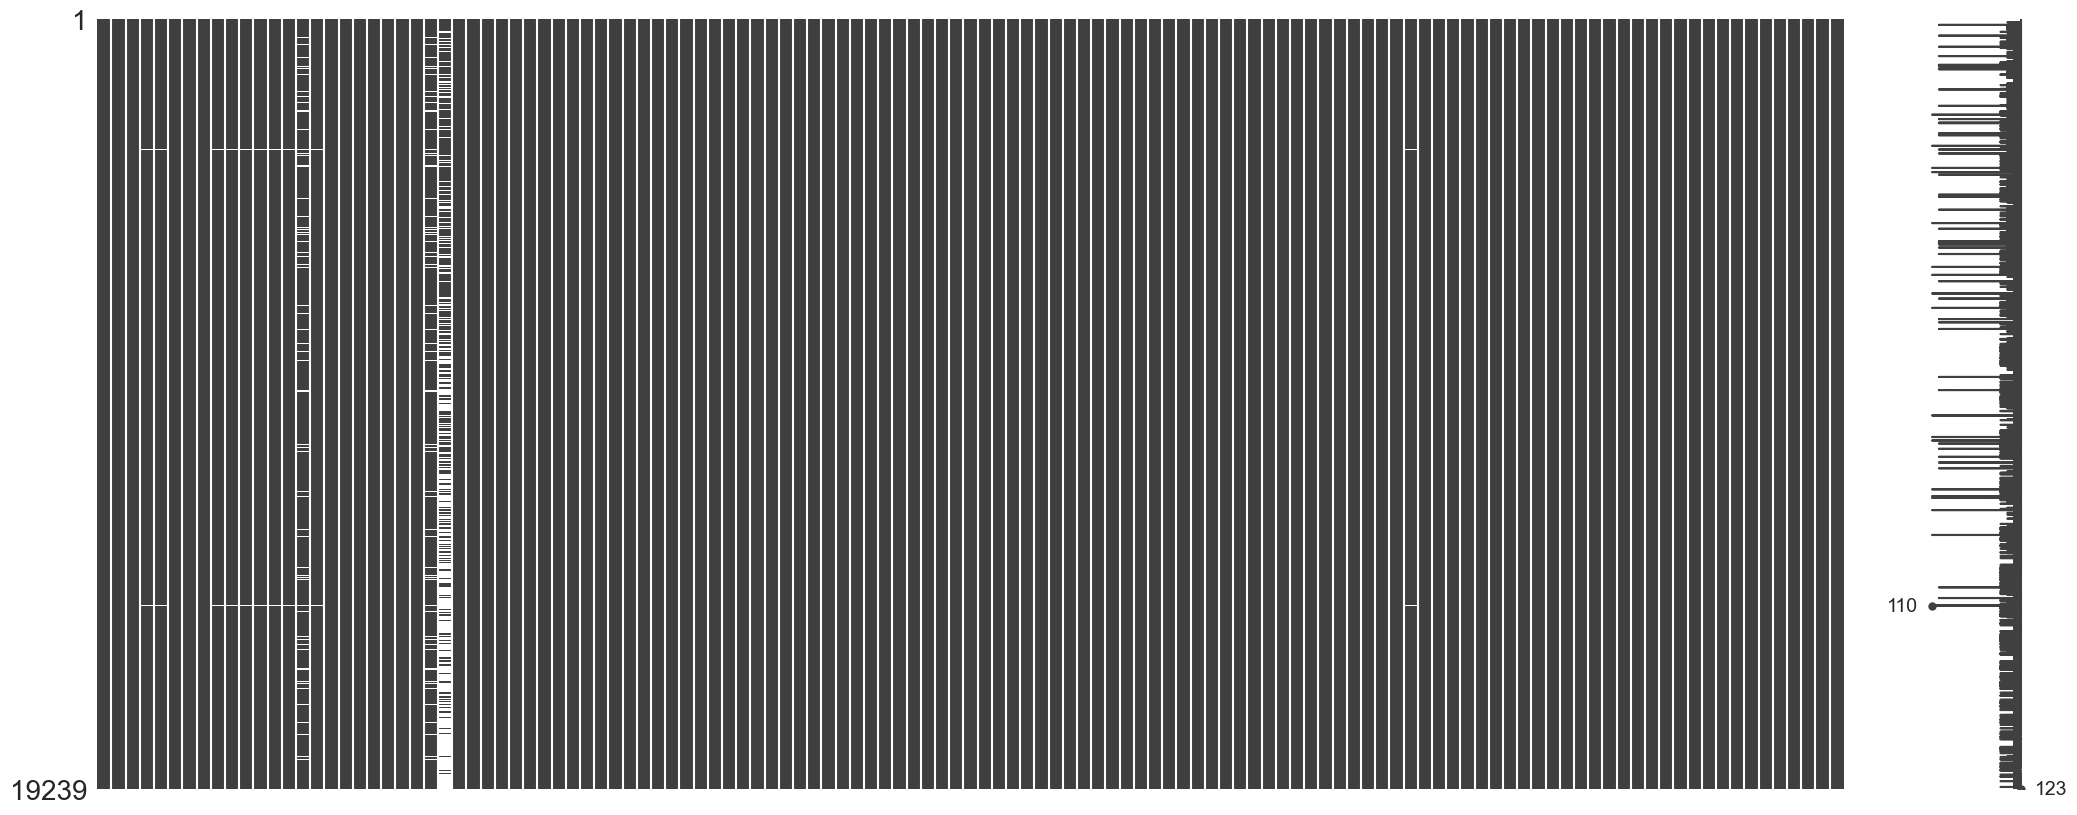

In [25]:
msno.matrix(new_df)

### To visualize how many non null values are present via bar graph
##### Top values (0.0, 1.0 etc) represnt 0% filled values or 100% filled values
##### Right side numbers represents total count of non null values
##### Bottom numbers represent scale of number of rows with max number = max number of rows

<AxesSubplot: >

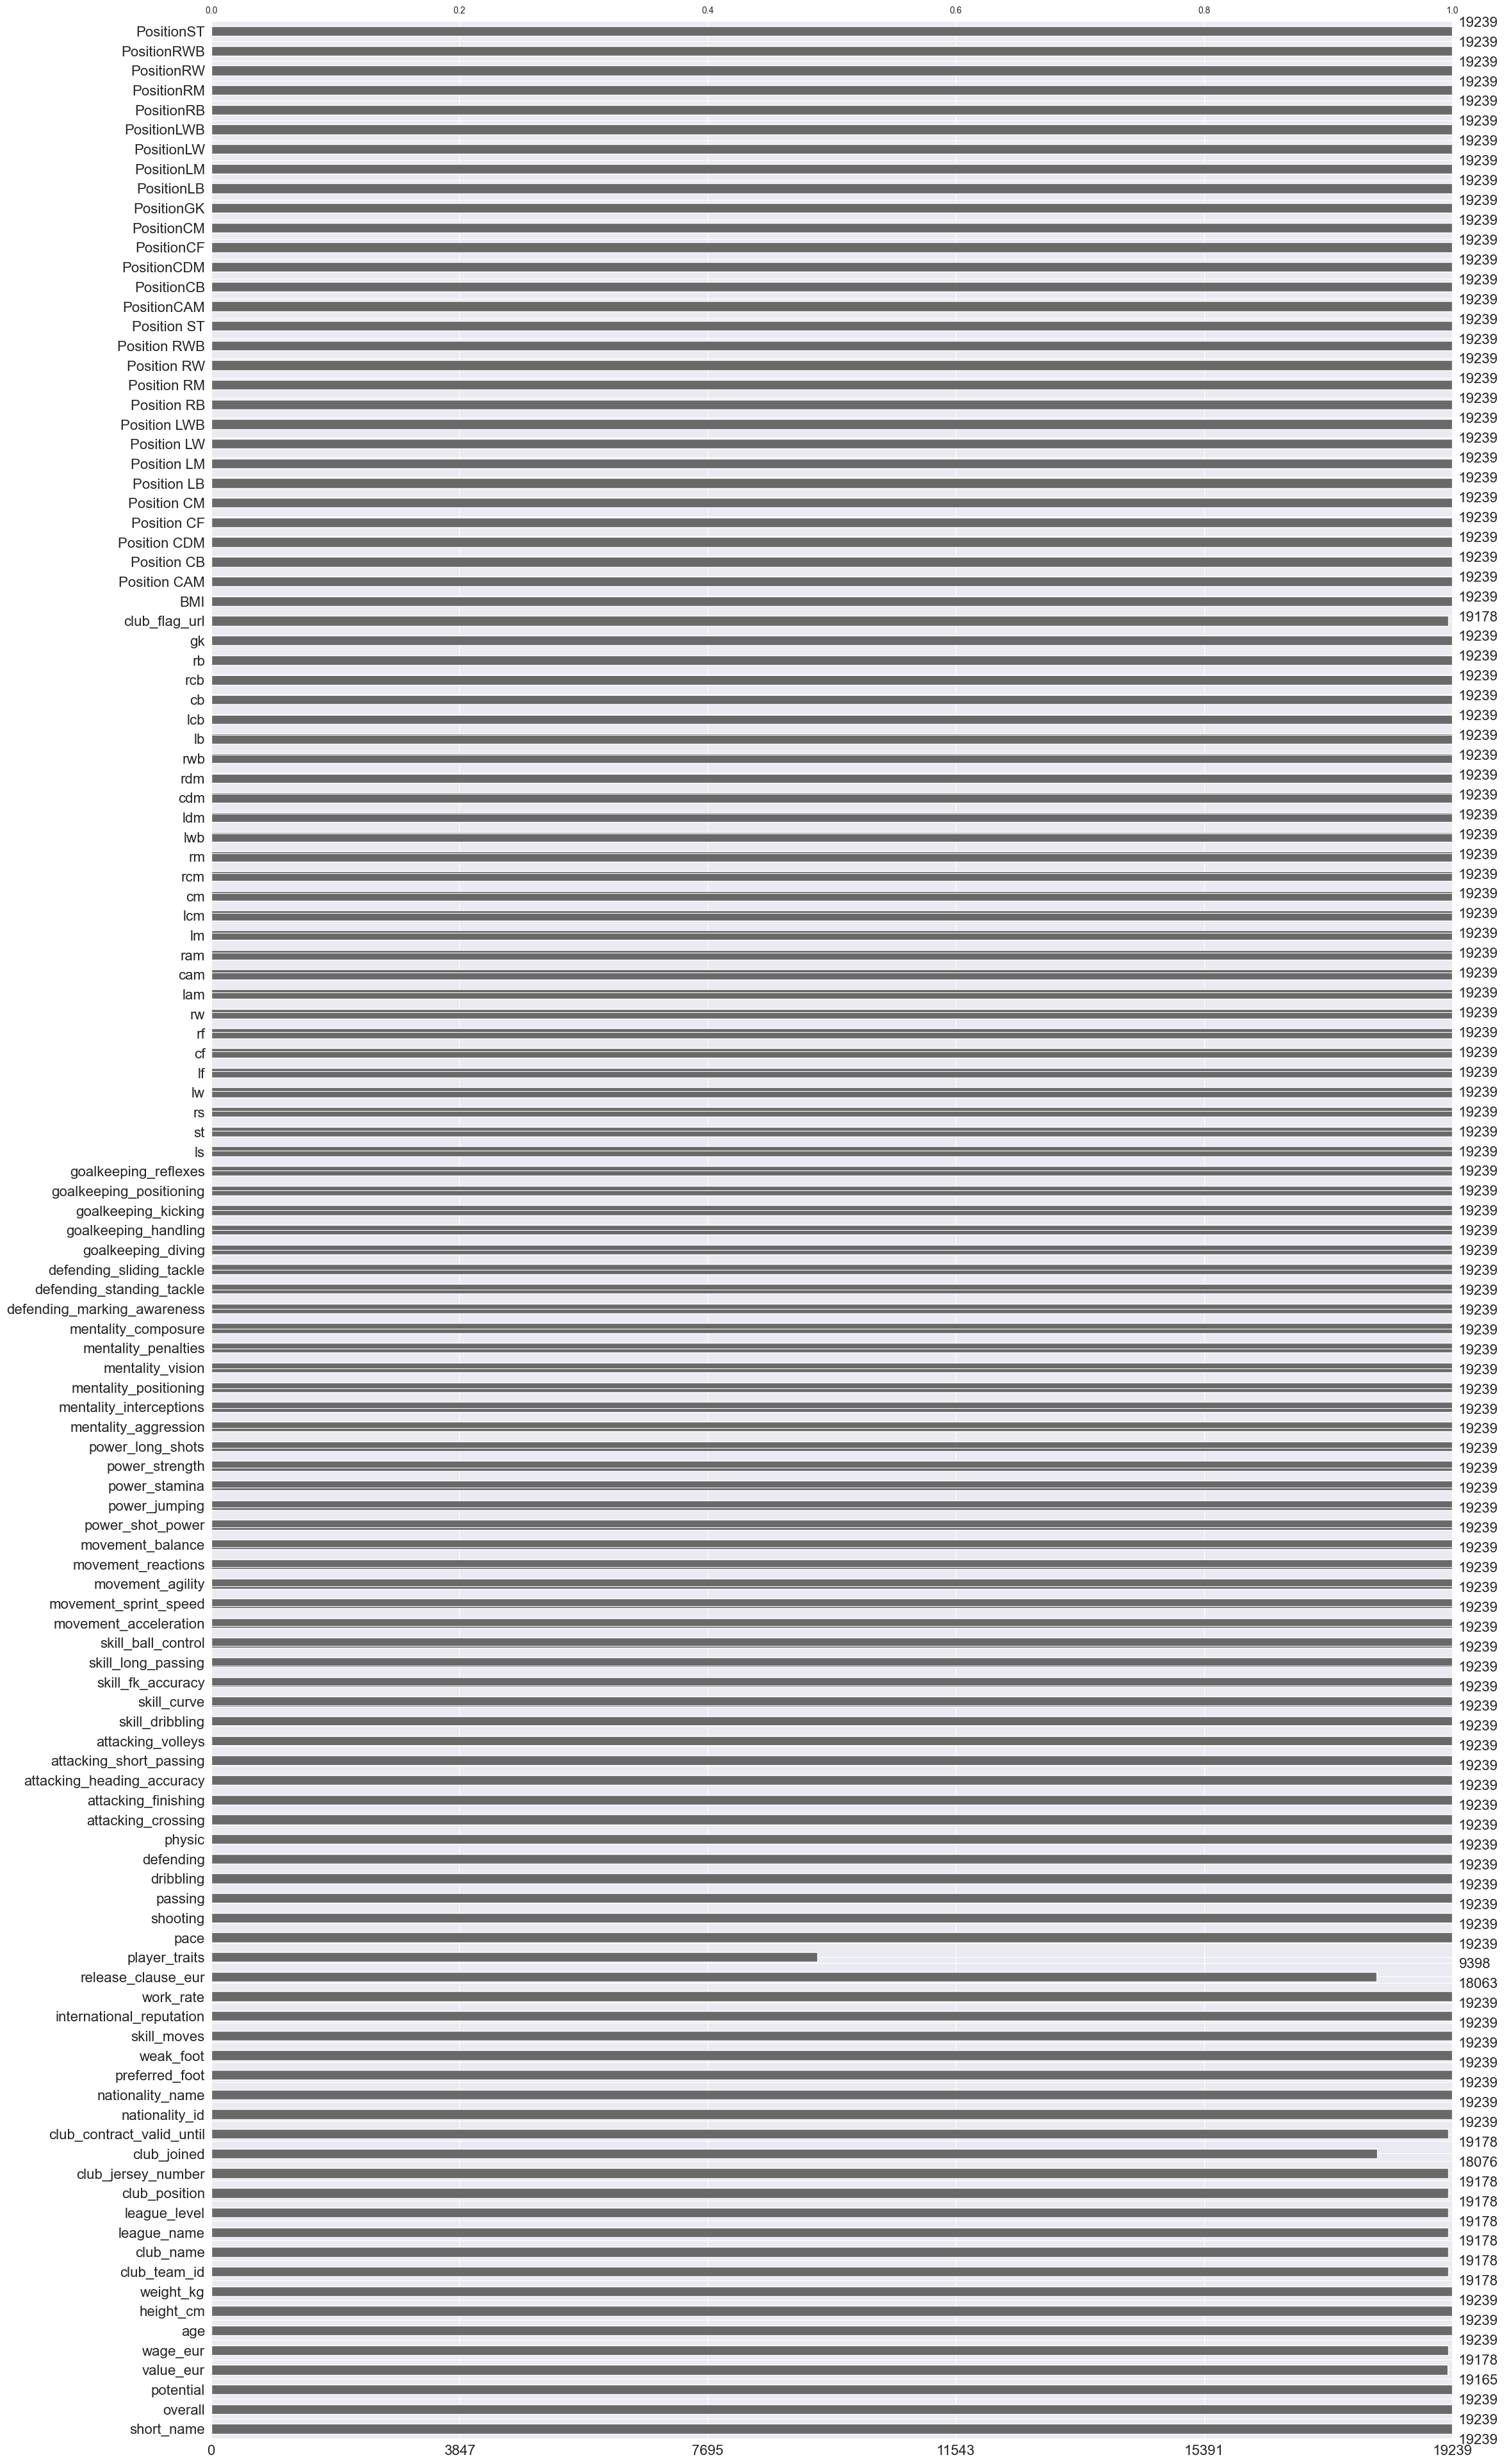

In [26]:
msno.bar(new_df)

## Data Analysis

### For Defenders Comparison

In [27]:
traits = ['overall','potential','pace','shooting','passing','dribbling','defending','physic']

In [28]:
#iloc[] is used to get the values of every column at that specific index
new_df.iloc[22][traits]

overall        88
potential      88
pace         70.0
shooting     70.0
passing      76.0
dribbling    74.0
defending    88.0
physic       84.0
Name: 22, dtype: object

In [29]:
new_df['short_name'][22]

'Sergio Ramos'

In [30]:
new_df['short_name'][15]

'V. van Dijk'

### Data of Ramos and Dajik

In [31]:
#to get ramos data for all traits and converting it to a list
values = new_df.iloc[22][traits].tolist()
#adding ist column value to list which is 88
#values is a list [:1] this means (element at 0th index)
values += values[:1]

In [32]:
values

[88, 88, 70.0, 70.0, 76.0, 74.0, 88.0, 84.0, 88]

In [33]:
values1 = new_df.iloc[15][traits].tolist()
values1 += values1[:1]

In [34]:
values1

[89, 89, 78.0, 60.0, 71.0, 72.0, 91.0, 84.0, 89]

In [35]:
for n in range(8):
    print(n)

0
1
2
3
4
5
6
7


In [41]:
def RadarChart(player, data, player2, data2):
    Attributes = ["Overall","Potential","Pace","Shooting","Passing","Dribbling","Defending","Physical"]

     #The + operator is used to concatenate the list of values with a copy of the first element of the list, 
    #which is a common step when creating a radar chart. This is because the first and last points on the chart 
    #need to be connected to create a closed polygon.
    data += data [:1]
    data2 += data2 [:1]
    
    #The code initializes an empty list angles, and then uses a list comprehension to iterate over the range of numbers 
    #from 0 to 7 (inclusive) using range(8).

    #For each value of n in the range, the code calculates the corresponding angle in radians using the formula n / 8 * 2 * pi.

    #The value 2 * pi represents a full circle in radians (i.e. 360 degrees), so n / 8 * 2 * pi 
    #calculates the fraction of a full circle that corresponds to each value of n.

    #For example, when n is 0, the angle will be 0 radians, which corresponds to the rightmost point on the radar chart. 
    #When n is 1, the angle will be pi / 4 radians, which corresponds to the top right point on the chart.

    #The resulting list angles will contain 8 evenly-spaced angles in radians that correspond to the 8 attributes of the players,
    #which can be used to plot the values on the radar chart.
    angles = [n / 8 * 2 * pi for n in range(8)]
    angles += angles [:1]
    angles2 = [n / 8 * 2 * pi for n in range(8)]
    angles2 += angles2 [:1]
    plt.figure(dpi=125)
    ax = plt.subplot(111, polar=True)
    ax = plt.subplot(111, polar=True)
    
    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,values)
    ax.fill(angles, values, 'teal', alpha=0.1)

    ax.plot(angles2,values1)
    ax.fill(angles2, values1, 'red', alpha=0.1)

    plt.figtext(0.1,0.98,player,color="steelblue")
    plt.figtext(0.1,0.94,"vs")
    plt.figtext(0.1,0.9,player2,color="darkorange")
    
    plt.show()

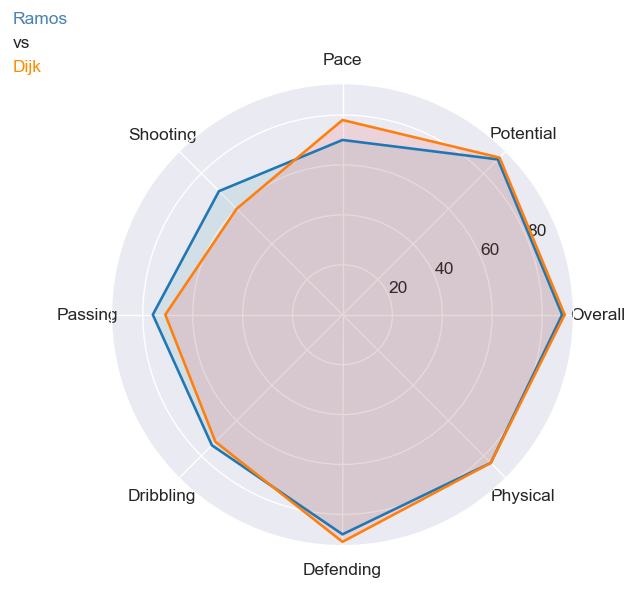

In [42]:
RadarChart('Ramos',[88, 88, 70.0, 70.0, 76.0, 74.0, 88.0, 84.0],
           'Dijk',[89, 89, 78.0, 60.0, 71.0, 72.0, 91.0, 84.0])

#### Top 100 players distributed by their Clubs

In [ ]:
plt.figure(figsize=(16,6),dpi = 150)
#The resulting plot will have one bar for each unique value in the "club_name" column, 
#showing the number of times that value appears in the first 100 rows of the data. The bars will be
#colored using the specified palette.

#means plot will have players club name that are repeated mostly in first 100 rows of dataframe
sns.countplot(x = 'club_name', data = new_df.head(100), palette='CMRmap')
plt.xticks(rotation=90)
plt.xlabel('Clubs')
plt.ylabel('Count')
plt.title('Top 100 Players by Club', fontsize=20)
plt.show()

#### Top 100 players distributed by their Countries

In [ ]:
plt.figure(figsize=(16,6), dpi=150)
#we will do same for this one but instead of club now our focus is nation team of the players
#we will pass x and data as args
sns.countplot(x = 'nationality_name', data =  new_df.head(100),palette='CMRmap')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 100 Players by Country', fontsize=20)
plt.show()

#### Top 100 players distributed by their Ligues

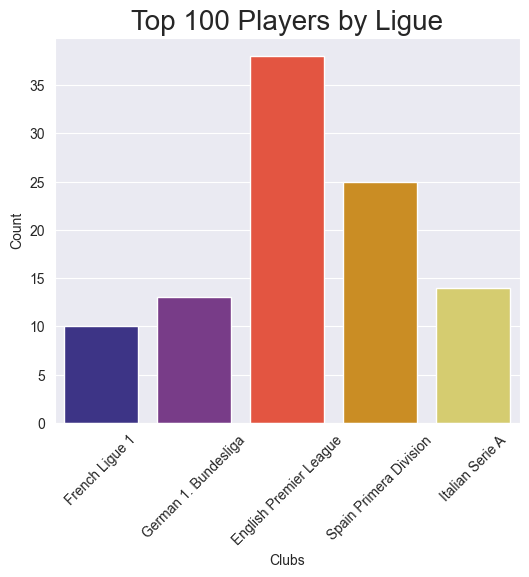

In [38]:
plt.figure(figsize=(6,5),dpi=100)
sns.countplot(x='league_name', data=new_df.head(100),palette='CMRmap')
plt.xticks(rotation=45)
plt.xlabel('Clubs')
plt.ylabel('Count')
plt.title('Top 100 Players by Ligue', fontsize=20)
plt.show()

#### Top 10 Emerging players

<Figure size 5200x1000 with 0 Axes>

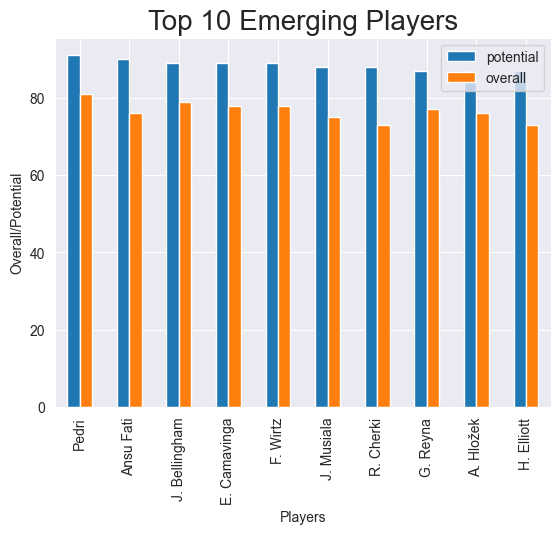

In [39]:
d = new_df
#condition for the emerging players; age must be less than 19
condition = (d.age<19)
included = d[condition]
check = included.sort_values(by=['potential','overall',"age"], ascending=[False,False,True])[['short_name','overall','potential','age','club_name','league_name','nationality_name']]

check = check.reset_index()
check = check.drop(['index'], axis=1)
check.drop(check.index[10:], inplace=True)
check.shape

overall=check['overall'].to_list()
potent=check['potential'].to_list()


plt.figure(figsize=(26,5),dpi=200)
check.plot(x='short_name', y=['potential','overall'], kind='bar', )
plt.xticks(rotation=90)
plt.xlabel('Players')
plt.ylabel('Overall/Potential')
plt.title('Top 10 Emerging Players', fontsize=20)
plt.show()